In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import random

In [47]:
# training data

X = np.array([[0.09, -0.44, -0.15],
            [0.69, -0.99, -0.76],
            [0.34, 0.65, -0.73],
            [0.15, 0.78, -0.58],
            [-0.63, -0.78, -0.56],
            [0.96, 0.62, -0.66],
            [0.63, -0.45, -0.14],
            [0.88, 0.64, -0.33]])

d = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])

# weigths and bias

w = np.array([0.77, 0.02, 0.63])
b = 0.0

# learning rate
lr = 0.01


### SGD

In [49]:
# function to iterate over the data one time and update weights and bias
def iterate_SGD():
    global X, d, w, b, lr
    # shuffle the data
    
    combined = list(zip(X, d))
    random.shuffle(combined)
    X, d = zip(*combined)
    X = np.array(X)
    d = np.array(d)
    
    

    for p in range(len(X)):
        up = np.dot(X[p], w) + b
        yp = up
        w = w+lr*X[p]*(d[p]-yp)
        b = b+lr*(d[p]-yp)

    return w, b


In [19]:
# calculate error
def calculate_error(X, d, w, b):
    error = 0.0
    for p in range(len(X)):
        up = np.dot(X[p], w) + b
        yp = up
        error += 0.5*(d[p] - yp) ** 2

    return error

Final Weights: [ 0.36935839  2.56627184 -0.21267714]
Final Bias:  -1.1657121550278908


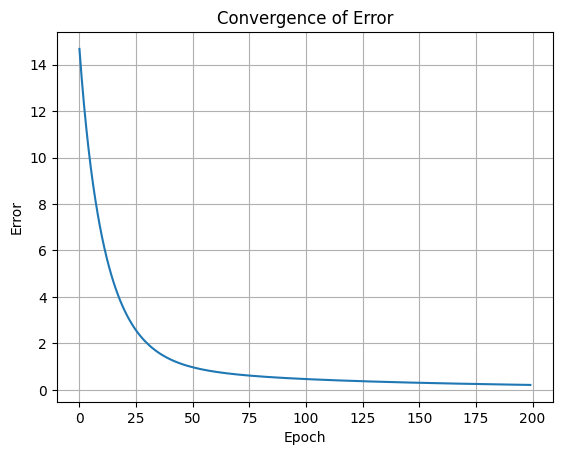

In [58]:
# plot convergence
def plot_convergence(iterate):
    global X, d, w, b, lr

    X = np.array([[0.09, -0.44, -0.15],
            [0.69, -0.99, -0.76],
            [0.34, 0.65, -0.73],
            [0.15, 0.78, -0.58],
            [-0.63, -0.78, -0.56],
            [0.96, 0.62, -0.66],
            [0.63, -0.45, -0.14],
            [0.88, 0.64, -0.33]])

    d = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])

    # weigths and bias

    w = np.array([0.77, 0.02, 0.63])
    b = 0.0

    # learning rate
    lr = 0.01

    nr_epochs = 200

    errors = np.zeros(nr_epochs)

    for epoch in range(nr_epochs):
        w, b = iterate_SGD()
        error = calculate_error(X, d, w, b)
        errors[epoch] = error

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.title('Convergence of Error')
    plt.grid()

    print("Final Weights:", w)
    print("Final Bias: ", b)


plot_convergence(iterate_SGD) 

In [51]:
# Predicted values of the training data

for p in range(len(X)):
    up = np.dot(X[p], w) + b
    yp = up
    print("Predicted: ", round(yp,2), "Target: ", d[p])

Predicted:  0.95 Target:  0.96
Predicted:  0.68 Target:  0.66
Predicted:  -2.37 Target:  -2.39
Predicted:  1.03 Target:  1.04
Predicted:  -2.55 Target:  -2.57
Predicted:  -3.0 Target:  -2.97
Predicted:  1.04 Target:  1.05
Predicted:  -3.21 Target:  -3.21


### GD

In [52]:
# function to iterate over the data one time and update weights and bias

def iterate_GD():
    global X, d, w, b, lr
    
    u = np.dot(X, w) + b
    y = u
    w = w+lr*np.dot(X.T,(d-y))

    return w, b

Final Weights: [0.72028474 0.82096478 0.7382928 ]
Final Bias:  -0.4809174298023271


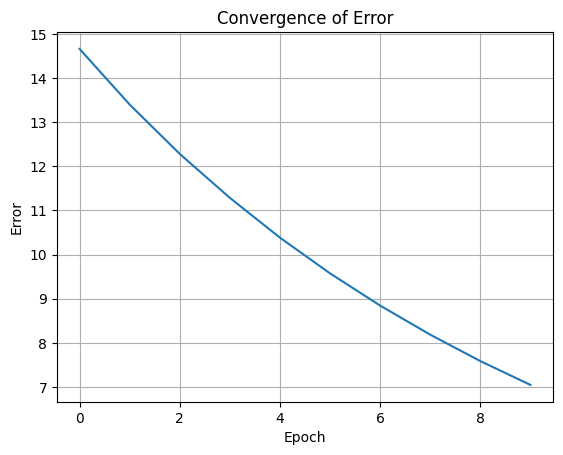

In [56]:
plot_convergence(iterate_GD)